# mount drive

In [1]:
use_colaboratory = True
if use_colaboratory:
    import os
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/kaggle/tabular-playground-series-mar-2022/notebook')

Mounted at /content/drive


In [2]:
# import packages
import datetime
import math
import pickle

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [3]:
# load data
train = pd.read_csv("../input/train.csv", index_col="row_id")
test = pd.read_csv("../input/test.csv", index_col="row_id")

In [16]:
data = pd.concat([train, test])
data["time"] = pd.to_datetime(data["time"])

In [19]:
data["hour"] = data["time"].dt.hour
data["minute"] = data["time"].dt.minute
data["weekday"] = data["time"].dt.weekday

col = ["x", "y", "direction", "hour", "minute", "weekday"]
minute_mean = data.iloc[:len(train)].groupby(col).mean()
minute_mean.columns = ["minute_mean"]
data = data.merge(minute_mean, how="left", left_on=col, right_index=True)

train = data.iloc[:len(train)]
test = data.iloc[len(train):]

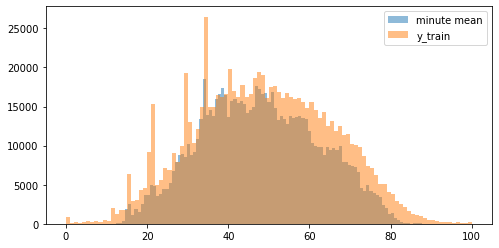

In [21]:
plt.figure(figsize=(8, 4))
plt.hist(train.minute_mean, bins=100, label="minute mean", alpha=0.5)
plt.hist(train.congestion, bins=100, label="y_train", alpha=0.5)
plt.legend()

In [22]:
submission = pd.read_csv("../input/sample_submission.csv")
submission.congestion = test.minute_mean.to_numpy()
submission.to_csv("../submit/submission_006.csv", index=False)

### submit

In [23]:
import json
with open('../../kaggle.json') as f:
    json_data = json.load(f)
    os.environ["KAGGLE_USERNAME"] = json_data["username"]
    os.environ["KAGGLE_KEY"] = json_data["key"]

!pip install kaggle --upgrade
!kaggle -v

Kaggle API 1.5.12


In [24]:
# submission
!kaggle competitions submit tabular-playground-series-mar-2022 -f ../submit/submission_006.csv -m "006"

100% 54.8k/54.8k [00:00<00:00, 276kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022